In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt
from numpy import linalg as LA
import seaborn as sns

Part A - Bhavuk: Data Cleaning

In [ ]:
df = pd.read_csv('framingham.csv')

# Checking the dataset
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
# Removing the education column as it is not related to our dataset

df.drop("education", axis = 1, inplace = True)

In [ ]:
# Checking for shape of the dataset and counts of nulls
df.shape

(4238, 15)

In [ ]:
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
# Dropping the null values from the dataset 
df.dropna(axis=0, inplace=True)

In [ ]:
counts = df['TenYearCHD'].value_counts()
print(counts)

0    3177
1     572
Name: TenYearCHD, dtype: int64


In [ ]:
df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

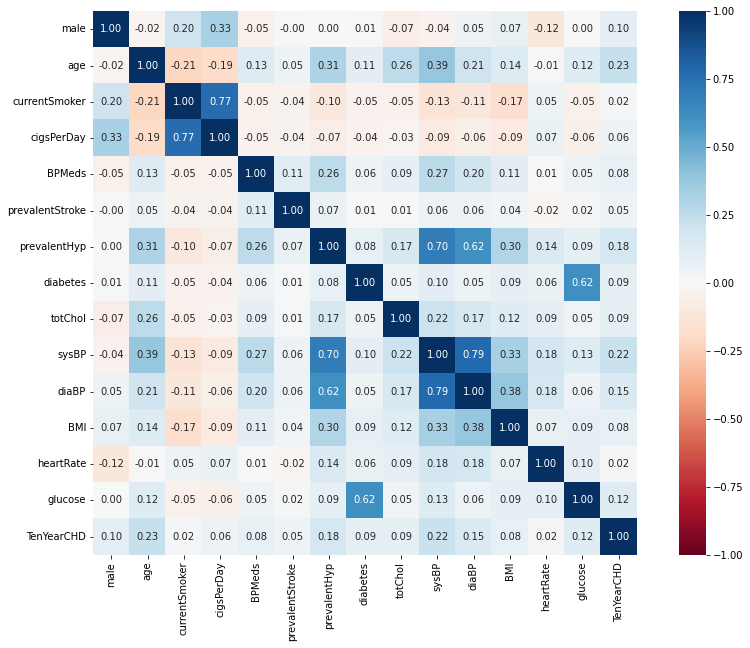

In [ ]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,7))
fig.set_size_inches(15, 10)
sns.heatmap(corr,vmin=-1, vmax=1, square=True, annot=True, fmt=".2f", cmap="RdBu", center=0, ax=ax)

plt.show()

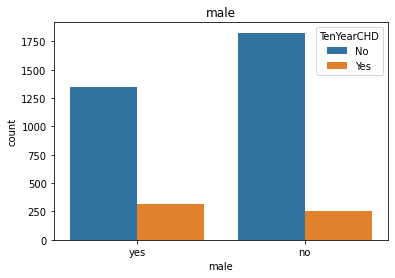

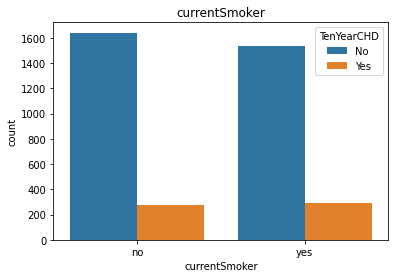

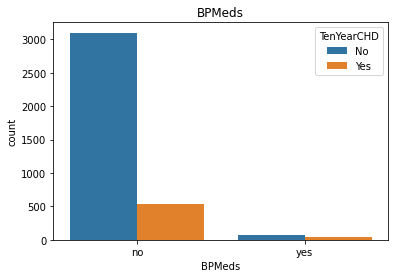

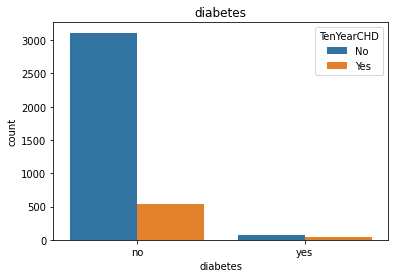

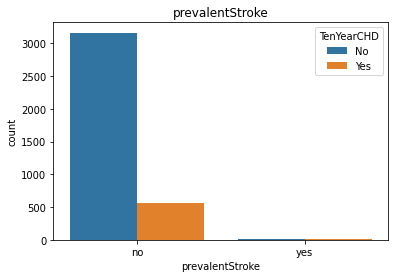

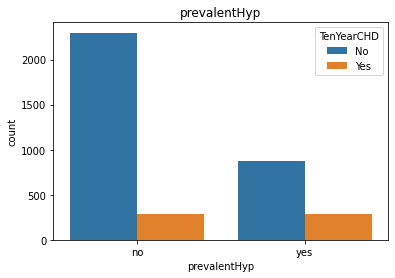

In [ ]:
cat_vars = df[['male', 'currentSmoker', 'BPMeds', 'diabetes', 'prevalentStroke', 'prevalentHyp','TenYearCHD']].replace({0:'no',1:'yes'})
for col in cat_vars.columns[:-1]:
    plt.figure()
    sns.countplot(x=col, hue='TenYearCHD', data=cat_vars )
    plt.title(col)
    plt.legend(title='TenYearCHD', labels=['No', 'Yes'])
    plt.show()

In [ ]:

# Type Changes
cols_to_category = ['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate','glucose','TenYearCHD']

for column in cols_to_category:
    df[column] = df[column].astype('category')

# only select people with no diabetes
with_diabetes = df[df['diabetes'] != '0']

print(df.shape)
df.head()

(3749, 15)


,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
age_group = pd.DataFrame(with_diabetes.groupby('age')['age']\
    .count()).rename(columns={'age':'Frequency'}).reset_index()\
        .sort_values(by=['Frequency'], ascending=True)
age_group

,age,Frequency
0,32,1
38,70,1
1,33,5
37,69,6
2,34,15
36,68,16
3,35,34
34,66,34
35,67,40
33,65,47


AttributeError: ignored

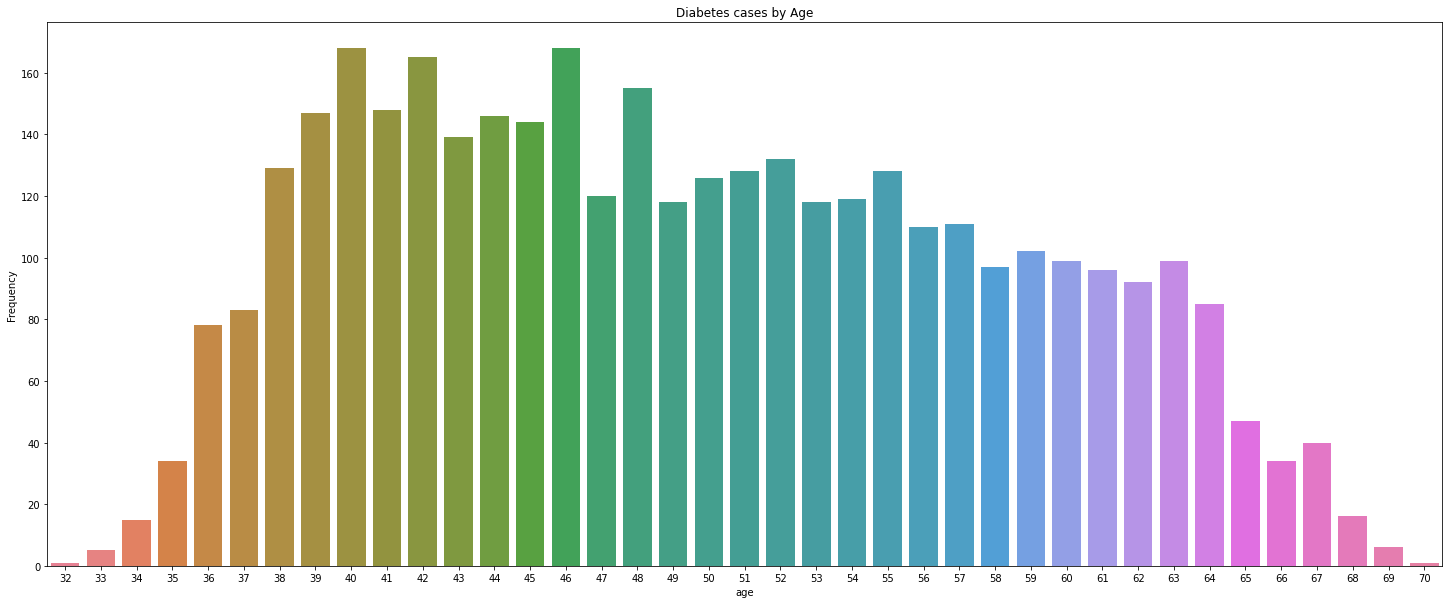

In [ ]:
chart_title = 'Diabetes cases by Age'
chart_data = age_group

fig, ax = plt.subplots(figsize=(25,10), facecolor='white')
sns.barplot(data=chart_data, x='age', y='Frequency', palette='husl')
plt.gca().set(title=chart_title)
ax.bar_label(ax.containers[-1]);


In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(x=df['age'],hue=df['TenYearCHD'])

Part D, Ashley - ROC Curve 

In [ ]:
! pip install dmba

In [ ]:
%matplotlib inline

from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score

In [ ]:
df.dtypes

In [ ]:
df 
y = df['TenYearCHD']
X = df.drop(columns=['TenYearCHD'])

# partition data
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1) #testsize if using 60% on data to train
#valid y is true | y is actual results
# fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)

In [ ]:
logit_reg_pred = logit_reg.predict(valid_X) #valid w/o target 
logit_reg_proba = logit_reg.predict_proba(valid_X)
logit_result = pd.DataFrame({'actual': valid_y, 
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_pred })
logit_reg_pred #only 400 text size of the data, results 


In [ ]:
classificationSummary(train_y, logit_reg.predict(train_X)) #60% DATA but not meaniful, its the experience already had, previous symptoms from patients.

classificationSummary(valid_y, logit_reg.predict(valid_X))
#using unknown symptoms of patients (new), using validx (new patient) to predict the actual results (valid y)

#

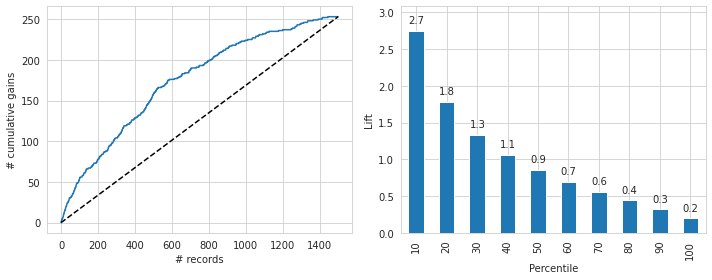

In [ ]:
logit_result['actual'] = df['actual'].astype(int)
df = logit_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

gainsChart(df.actual, ax=axes[0])
liftChart(df['p(1)'], title=False, ax=axes[1])
    
plt.tight_layout()
plt.show()

#using TenYearCHD

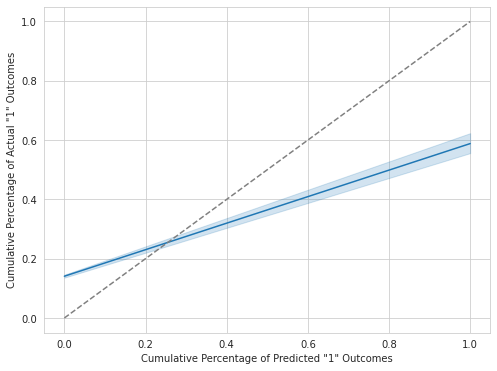

In [ ]:
# Create the gain chart using Seaborn
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8,6))
sns.lineplot(x=logit_reg_pred, y=logit_result['p(1)'], ax=ax)
sns.lineplot(x=[0, 1], y=[0, 1], linestyle='--', color='gray', ax=ax)
ax.set_xlabel('Cumulative Percentage of Predicted "1" Outcomes')
ax.set_ylabel('Cumulative Percentage of Actual "1" Outcomes')
plt.show()

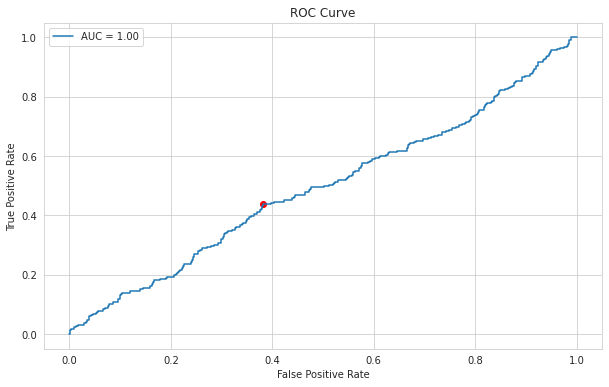

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fig, ax = plt.subplots(figsize=(10,6))


# calculate fpr and tpr for each probability threshold
fpr, tpr, thresholds = roc_curve(logit_result['actual'], df['p(1)'])

# calculate AUC score
auc_score = roc_auc_score(logit_reg_pred, logit_result['p(1)'])

# plot ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# find index of best threshold based on distance from top-left corner
dist = np.sqrt(fpr**2 + (1-tpr)**2)
best_idx = np.argmin(dist)

# plot marker for best point on curve
plt.scatter(fpr[best_idx], tpr[best_idx], color='red')
plt.show()

In [ ]:
# check results
# intersection of True positive rate and false positive rate will be the best point on our ROC curve
# df_test = df

# TP = df_test[(df_test.x>=cut_off.x)&(df_test.y==1)].index.size
# FP = df_test[(df_test.x>=cut_off.x)&(df_test.y==0)].index.size
# TN = df_test[(df_test.x< cut_off.x)&(df_test.y==0)].index.size
# FN = df_test[(df_test.x< cut_off.x)&(df_test.y==1)].index.size

print("True Positive Rate: ", np.median(tpr))
print("False Positive Rate:", np.median(fpr))

True Positive Rate:  0.5158102766798419
False Positive Rate: 0.529270248596632
